Basis pursuit
=============

Reimplementation of 
https://github.com/SpM-lab/CS-tools/tree/master/jpsj-review/basis_pursuit

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import sys
sys.path.append("../src/")

In [4]:
from admmsolver.objectivefunc import LeastSquares, L1Regularizer
from admmsolver.optimizer import SimpleOptimizer
from admmsolver.matrix import identity
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [5]:
# Dimension of the signal
N = 1000

M = 100
K = 20    
seed = 1234
np.random.seed(seed)
A = np.random.randn(M,N)

#Make answer vector
xanswer = np.zeros(N)
xanswer[:K] = np.random.randn(K)
xanswer = np.random.permutation(xanswer)

y_calc = np.dot(A, xanswer)

In [6]:
lstsq = LeastSquares(1.0, A, y_calc)
l1 = L1Regularizer(1.0e-1, A.shape[1])
equality_conditions = [
      (1, 0, identity(N), identity(N), 1.0, None)
]
opt = SimpleOptimizer([lstsq, l1], equality_conditions)

In [7]:
niter = 100
opt.solve(niter)

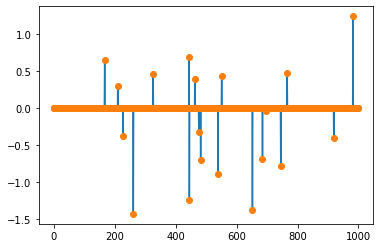

In [8]:
plt.plot(opt.x[0].real, label="x")
plt.plot(xanswer, label="answer", ls="", marker="o")
plt.show()

In [13]:
print(np.abs(xanswer).max())
print(np.abs(xanswer-opt.x[0]).max())

1.4312955709975443
0.005407010762636388
